# Ходил по kaggle и глазу зацепился датасет шоу на нетфликс. Сам иногда смотрю там различные сериалы и фильмы.

In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"]= 11, 11
sns.set_theme(style="darkgrid") # не могу жить без графиков с сеточками(

netflix_show_frame = pd.read_csv("./netflix_titles.csv", encoding="utf-8")

netflix_show_frame.info()


def set_plot_size(ax: plt.axis, xlabel: str, ylabel: str, title: str, size=20) -> None:
    ax.set_title(title, fontsize=size)
    ax.set_xlabel(xlabel, fontsize=size)
    ax.set_ylabel(ylabel, fontsize=size)
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	    label.set_fontsize(size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [262]:
netflix_show_frame.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Кол-во добавляемых фильмов по годам.
Кол-во добавляемых фильмов начало падать в конце 2018 года. Думаю это связано с появлением различных стримминговых сервисов по типу disney+, которые свои шоу размещают на свои платформах. Эти сервисы как раз начали появляться примерно в 18-19 годах

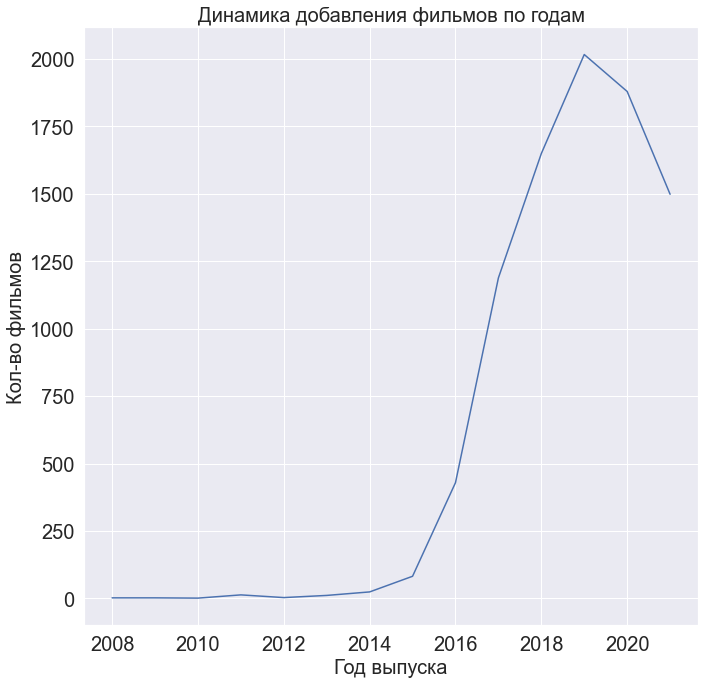

In [263]:
# динамика добавления шоу по годам
netflix_show_frame['year_added'] = pd.to_datetime(netflix_show_frame['date_added']).dt.year.astype("Int64")
group_years_frame = netflix_show_frame.groupby("year_added").count()

ax = sns.lineplot(data=group_years_frame["show_id"])
set_plot_size(ax, "Год выпуска", "Кол-во фильмов", "Динамика добавления фильмов по годам")

## Распределение фильмов по продолжительности

В среднем продолжительность примерно 90 минут, как и показал график. Удивительно, что есть фильмы, с продолжительностью меньше 20 минут. Фильмы с продолжительностью свыше нескольких часов неудивительны (привет режиссёрским версиям властелина колец) 

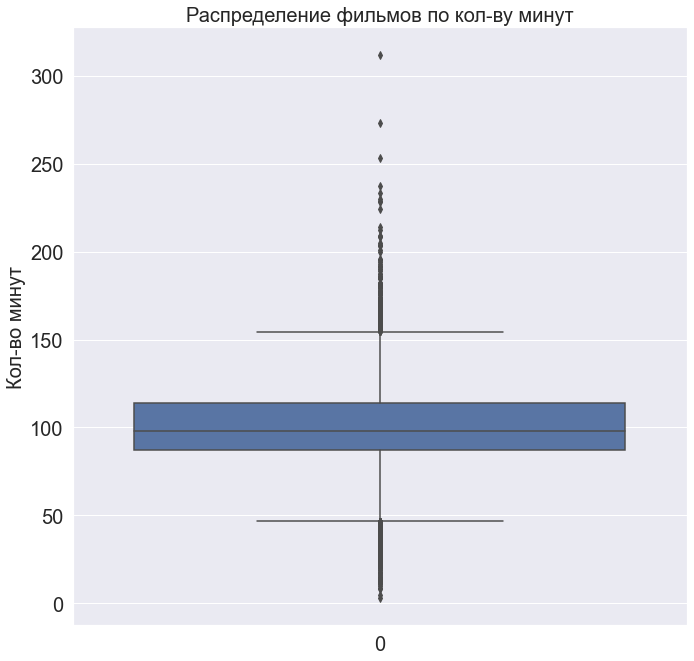

In [264]:
# распределение фильмов по кол-ву минут (длительности)

movie_frame = netflix_show_frame[netflix_show_frame["duration"].notna()].loc[netflix_show_frame["type"].str.contains("Movie")]
movie_frame["duration"] = movie_frame["duration"].str.extract("\D*(\d+)\D*")
movie_frame["duration"] = pd.to_numeric(movie_frame["duration"])

ax = sns.boxplot(data=movie_frame["duration"])
set_plot_size(ax, "", "Кол-во минут", "Распределение фильмов по кол-ву минут")

## Фильмы с самой маленькой продолжительностью
Время посмотреть, что это за чудофильмы с такой продолжительностью. Кажется фильмом может считаться любое видео.

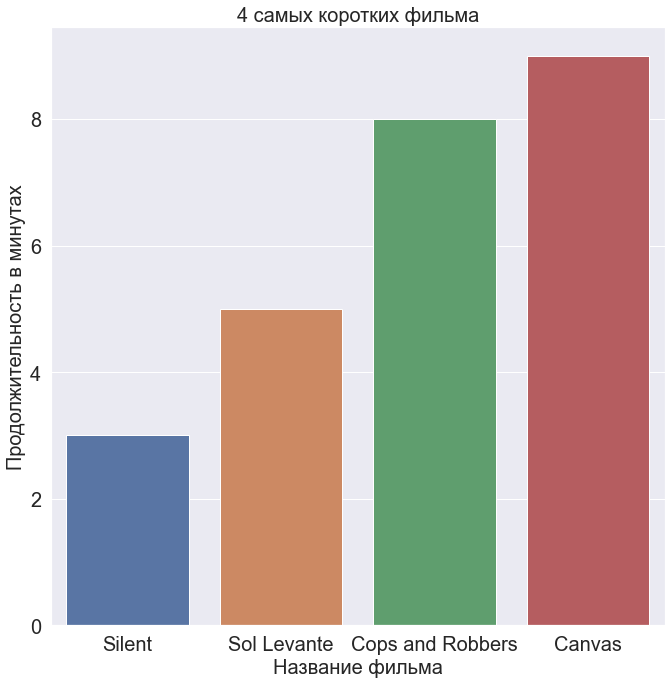

In [265]:

movie_frame = netflix_show_frame[netflix_show_frame["duration"].notna()].loc[netflix_show_frame["type"].str.contains("Movie")]
movie_frame["duration"] = movie_frame["duration"].str.extract("\D*(\d+)\D*")
movie_frame["duration"] = pd.to_numeric(movie_frame["duration"])

movie_frame = movie_frame.sort_values(by=["duration"], ascending=True).head(4)

ax = sns.barplot(data=movie_frame, x="title", y="duration")
set_plot_size(ax, "Название фильма", "Продолжительность в минутах", "4 самых коротких фильма")

## Число добавленных фильмов по месяцем и годам. 
По графику не так можно много сказать.  По сути 2015 год, это первый год с которого ежемесячно начали добавлятсья фильмы. Разброс по месяцам достаточно хаотичен. Видимо добавляют как добавят и всё. С 2019 года начался первый провал. Примерно с этого момента и началось убывание добавений фильмов.

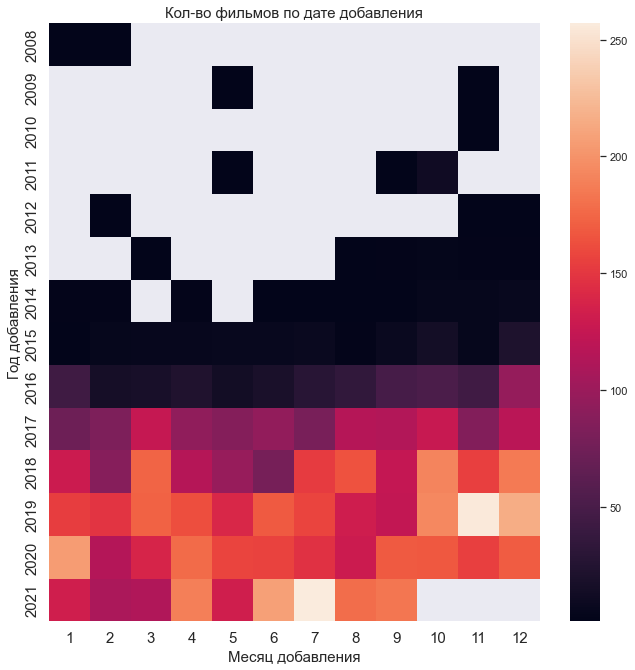

In [260]:
count_show_frame = netflix_show_frame[["date_added", "show_id"]].copy()
count_show_frame["year"] = pd.to_datetime(count_show_frame["date_added"]).dt.year.astype("Int64")
count_show_frame["month"] = pd.to_datetime(count_show_frame["date_added"]).dt.month.astype("Int64")

count_show_frame = count_show_frame.groupby(["year", "month"]).count().reset_index()
data = count_show_frame.pivot(index="year", columns="month", values="show_id")
ax = sns.heatmap(data)
set_plot_size(ax, "Месяц добавления", "Год добавления", "Кол-во фильмов по дате добавления", 15)

## ну и как же без лидера визуализаций!!!
### доля шоу
PIE CHART

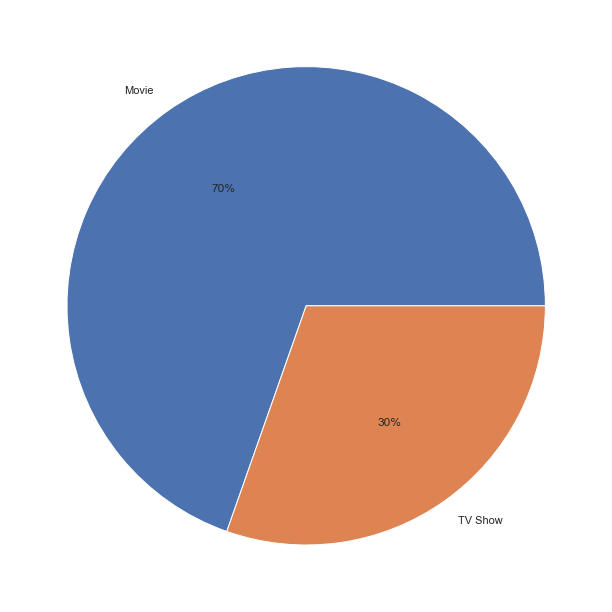

In [253]:
type_show_count = netflix_show_frame.groupby("type").count().reset_index()
ax = plt.pie(type_show_count["show_id"], labels = type_show_count["type"], autopct='%.0f%%')

![картиночка](./picture.png)